In [129]:
import torch #파이토치
import torchvision.datasets as dsets #MNIST 데이터셋을 불러옴
import torchvision.transforms as transforms #이미지 변환 툴
import torch.nn.init #텐서에 초기값을 줌

import matplotlib.pyplot as plt
import numpy as np

In [130]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [131]:
trainset = dsets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)

testset = dsets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transforms.ToTensor()
)

# try1
- 올려주신 코드를 사용

In [132]:
learning_rate = 0.001 #가중치를 얼마나 크게 갱신할지 결정하는 학습률
training_epochs = 15 #반복학습의 횟수
batch_size = 100 #한 iteration에서 사용할 데이터 크기

In [133]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

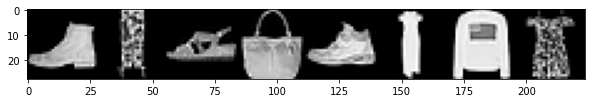

In [134]:
# 데이터(이미지) 확인해보기
from torchvision import utils

dataiter       = iter(test_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:8], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [135]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        # first layer
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),   # convolution
            torch.nn.ReLU(),   # activation function
            torch.nn.MaxPool2d(kernel_size=2, stride=2))   # pooling

        # second layer
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # fully-connected layer 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # fully-connected layer 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.fc(out) # fully-connected layer 통과
        return out

In [136]:
model1 = CNN().to(device) 

In [137]:
criterion = torch.nn.CrossEntropyLoss().to(device)   # loss function 정의
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)   #optimizer 정의, Adam으로 설정

In [138]:
def training_model(model, data, epochs):
  total_batch = len(data)

  for epoch in range(epochs):
    avg_cost = 0

    for X, Y in data:  #data_loader에 배치들이 저장되어 있음. 한 iteration당 한 개의 배치를 꺼내와서 사용
        X = X.to(device)   #이미지
        Y = Y.to(device)   #레이블(해당 이미지가 뜻하는 숫자)

        optimizer.zero_grad()   #지난 iteration에서 계산했던 기울기 초기화
        hypothesis = model(X)   #순전파 과정으로 예측값 도출
        cost = criterion(hypothesis, Y)   #예측값과 실제값을 비교한 loss
        cost.backward()   #역전파, 기울기 계산
        optimizer.step()   #optimizer로 가중치 갱신

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

In [139]:
#모델 학습
training_model(model = model1, data = train_loader, epochs = training_epochs)

[Epoch:    1] cost = 0.510953963
[Epoch:    2] cost = 0.330859184
[Epoch:    3] cost = 0.292297214
[Epoch:    4] cost = 0.266421705
[Epoch:    5] cost = 0.247414067
[Epoch:    6] cost = 0.231193691
[Epoch:    7] cost = 0.219147235
[Epoch:    8] cost = 0.205752105
[Epoch:    9] cost = 0.195321754
[Epoch:   10] cost = 0.18343696
[Epoch:   11] cost = 0.174545303
[Epoch:   12] cost = 0.166471109
[Epoch:   13] cost = 0.159135595
[Epoch:   14] cost = 0.150935128
[Epoch:   15] cost = 0.141308293


In [140]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model1(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.9108


# try1-2
- 모델은 그대로
- lr 0.01 epoch 20 batch size 120으로 변경

In [141]:
learning_rate = 0.01 #가중치를 얼마나 크게 갱신할지 결정하는 학습률
training_epochs = 20 #반복학습의 횟수
batch_size = 120 #한 iteration에서 사용할 데이터 크기

In [142]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

In [143]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        # first layer
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),   # convolution
            torch.nn.ReLU(),   # activation function
            torch.nn.MaxPool2d(kernel_size=2, stride=2))   # pooling

        # second layer
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # fully-connected layer 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # fully-connected layer 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.fc(out) # fully-connected layer 통과
        return out

In [144]:
model1 = CNN().to(device) 

In [145]:
criterion = torch.nn.CrossEntropyLoss().to(device)   # loss function 정의
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)   #optimizer 정의, Adam으로 설정

In [146]:
#모델 학습
training_model(model = model1, data = train_loader, epochs = training_epochs)

[Epoch:    1] cost = 0.444995672
[Epoch:    2] cost = 0.299361825
[Epoch:    3] cost = 0.274358004
[Epoch:    4] cost = 0.258610666
[Epoch:    5] cost = 0.250977784
[Epoch:    6] cost = 0.240514338
[Epoch:    7] cost = 0.234005913
[Epoch:    8] cost = 0.226072118
[Epoch:    9] cost = 0.225680605
[Epoch:   10] cost = 0.223359421
[Epoch:   11] cost = 0.22290498
[Epoch:   12] cost = 0.211738661
[Epoch:   13] cost = 0.213255033
[Epoch:   14] cost = 0.211711273
[Epoch:   15] cost = 0.205952048
[Epoch:   16] cost = 0.206955448
[Epoch:   17] cost = 0.200307339
[Epoch:   18] cost = 0.202586278
[Epoch:   19] cost = 0.199779928
[Epoch:   20] cost = 0.196470499


In [147]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model1(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.8866


#try2
- 모델에 레이어 추가
- batch norm도 추가


In [148]:
learning_rate = 0.001 #가중치를 얼마나 크게 갱신할지 결정하는 학습률
training_epochs = 25 #반복학습의 횟수
batch_size = 120 #한 iteration에서 사용할 데이터 크기

In [149]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

In [150]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        # fourth layer (64->128)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        self.fc1 = torch.nn.Linear(3 * 3 * 128, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)   # 가중치 초기화
        self.layer5 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        self.fc2 = torch.nn.Linear(512, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer6 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3))
         
        self.fc3 = torch.nn.Linear(128, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)


    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = self.layer3(out)
        out = self.layer4(out)  
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.layer5(out) 
        out = self.layer6(out)
        out = self.fc3(out)   # fifth layer 통과
        return out

In [151]:
model2 = CNN().to(device)

In [152]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)


In [153]:
#모델 학습
training_model(model = model2, data = train_loader, epochs = training_epochs)


[Epoch:    1] cost = 0.555624962
[Epoch:    2] cost = 0.340292782
[Epoch:    3] cost = 0.285076022
[Epoch:    4] cost = 0.252815068
[Epoch:    5] cost = 0.228929922
[Epoch:    6] cost = 0.216105342
[Epoch:    7] cost = 0.196161449
[Epoch:    8] cost = 0.181076005
[Epoch:    9] cost = 0.170850083
[Epoch:   10] cost = 0.160815209
[Epoch:   11] cost = 0.148849189
[Epoch:   12] cost = 0.134817481
[Epoch:   13] cost = 0.127271056
[Epoch:   14] cost = 0.118044503
[Epoch:   15] cost = 0.109723479
[Epoch:   16] cost = 0.100061886
[Epoch:   17] cost = 0.0921889916
[Epoch:   18] cost = 0.0855516866
[Epoch:   19] cost = 0.079368107
[Epoch:   20] cost = 0.0745265186
[Epoch:   21] cost = 0.0680717379
[Epoch:   22] cost = 0.0680939257
[Epoch:   23] cost = 0.060081955
[Epoch:   24] cost = 0.0555027761
[Epoch:   25] cost = 0.0547045581


In [154]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model2(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.9166


try2-2

In [155]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        # fourth layer (64->128)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        self.fc1 = torch.nn.Linear(3 * 3 * 128, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)   # 가중치 초기화
        self.layer5 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        self.fc2 = torch.nn.Linear(512, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer6 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3))
         
        self.fc3 = torch.nn.Linear(128, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)


    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = self.layer3(out)
        out = self.layer4(out)  
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.layer5(out) 
        out = self.layer6(out)
        out = self.fc3(out)   # fifth layer 통과
        return out

In [156]:
model3 = CNN().to(device)

In [157]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)


In [158]:
#모델 학습
training_model(model = model3, data = train_loader, epochs = training_epochs)


[Epoch:    1] cost = 0.677952707
[Epoch:    2] cost = 0.367882758
[Epoch:    3] cost = 0.303254366
[Epoch:    4] cost = 0.266850978
[Epoch:    5] cost = 0.23787424
[Epoch:    6] cost = 0.216433823
[Epoch:    7] cost = 0.201484069
[Epoch:    8] cost = 0.187283337
[Epoch:    9] cost = 0.174399793
[Epoch:   10] cost = 0.160761982
[Epoch:   11] cost = 0.147777438
[Epoch:   12] cost = 0.140529841
[Epoch:   13] cost = 0.129546091
[Epoch:   14] cost = 0.119425461
[Epoch:   15] cost = 0.11258769
[Epoch:   16] cost = 0.103374436
[Epoch:   17] cost = 0.0952270105
[Epoch:   18] cost = 0.0899363309
[Epoch:   19] cost = 0.0900530666
[Epoch:   20] cost = 0.0768126696
[Epoch:   21] cost = 0.0766010806
[Epoch:   22] cost = 0.0689105839
[Epoch:   23] cost = 0.0662496537
[Epoch:   24] cost = 0.0643855333
[Epoch:   25] cost = 0.0599787757


In [159]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model3(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.912


#try3
- avg pooling으로 바꾸기


In [160]:
learning_rate = 0.001 #가중치를 얼마나 크게 갱신할지 결정하는 학습률
training_epochs = 25 #반복학습의 횟수
batch_size = 120 #한 iteration에서 사용할 데이터 크기

In [161]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

In [162]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2,padding=1))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=1))
        # fourth layer (64->128)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=1))

        self.fc1 = torch.nn.Linear(3 * 3 * 128, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)   # 가중치 초기화
        self.layer5 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        self.fc2 = torch.nn.Linear(512, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer6 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3))
         
        self.fc3 = torch.nn.Linear(128, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)


    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = self.layer3(out)
        out = self.layer4(out)  
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.layer5(out) 
        out = self.layer6(out)
        out = self.fc3(out)   # fifth layer 통과
        return out

In [164]:
model3 = CNN().to(device)

In [167]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)


In [169]:
#모델 학습
training_model(model = model3, data = train_loader, epochs = training_epochs)


[Epoch:    1] cost = 0.528315783
[Epoch:    2] cost = 0.329663455
[Epoch:    3] cost = 0.278781831
[Epoch:    4] cost = 0.252415687
[Epoch:    5] cost = 0.228998348
[Epoch:    6] cost = 0.2152711
[Epoch:    7] cost = 0.201739118
[Epoch:    8] cost = 0.187399298
[Epoch:    9] cost = 0.174704939
[Epoch:   10] cost = 0.165198833
[Epoch:   11] cost = 0.152460381
[Epoch:   12] cost = 0.142103851
[Epoch:   13] cost = 0.133447871
[Epoch:   14] cost = 0.127698377
[Epoch:   15] cost = 0.119277723
[Epoch:   16] cost = 0.109577499
[Epoch:   17] cost = 0.103769541
[Epoch:   18] cost = 0.0920441523
[Epoch:   19] cost = 0.0878325701
[Epoch:   20] cost = 0.0853638873
[Epoch:   21] cost = 0.0808930397
[Epoch:   22] cost = 0.0714069828
[Epoch:   23] cost = 0.0679265186
[Epoch:   24] cost = 0.0653680116
[Epoch:   25] cost = 0.0599386841


In [170]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model2(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.9176


#try3
- drop out rate 0.7로 변경


In [171]:
learning_rate = 0.001 #가중치를 얼마나 크게 갱신할지 결정하는 학습률
training_epochs = 25 #반복학습의 횟수
batch_size = 120 #한 iteration에서 사용할 데이터 크기

In [172]:
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

In [173]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.3

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2,padding=1))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=1))
        # fourth layer (64->128)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=1))

        self.fc1 = torch.nn.Linear(3 * 3 * 128, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)   # 가중치 초기화
        self.layer5 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        self.fc2 = torch.nn.Linear(512, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer6 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3))
         
        self.fc3 = torch.nn.Linear(128, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)


    def forward(self, x):
        out = self.layer1(x)   # first layer 통과
        out = self.layer2(out)   # second layer 통과
        out = self.layer3(out)
        out = self.layer4(out)  
        out = out.view(out.size(0), -1)   # fully-connected layer를 위해서 Flatten
        out = self.layer5(out) 
        out = self.layer6(out)
        out = self.fc3(out)   # fifth layer 통과
        return out

In [174]:
model4 = CNN().to(device)

In [175]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model4.parameters(), lr=learning_rate)


In [176]:
#모델 학습
training_model(model = model4, data = train_loader, epochs = training_epochs)


[Epoch:    1] cost = 0.612061799
[Epoch:    2] cost = 0.36502865
[Epoch:    3] cost = 0.310007215
[Epoch:    4] cost = 0.273684949
[Epoch:    5] cost = 0.252253205
[Epoch:    6] cost = 0.235745087
[Epoch:    7] cost = 0.220950067
[Epoch:    8] cost = 0.21039021
[Epoch:    9] cost = 0.19626309
[Epoch:   10] cost = 0.183077693
[Epoch:   11] cost = 0.174472421
[Epoch:   12] cost = 0.167992264
[Epoch:   13] cost = 0.15438585
[Epoch:   14] cost = 0.145278692
[Epoch:   15] cost = 0.139480025
[Epoch:   16] cost = 0.133766055
[Epoch:   17] cost = 0.123221137
[Epoch:   18] cost = 0.117440715
[Epoch:   19] cost = 0.108520865
[Epoch:   20] cost = 0.104975343
[Epoch:   21] cost = 0.0981202498
[Epoch:   22] cost = 0.0928615853
[Epoch:   23] cost = 0.0870129764
[Epoch:   24] cost = 0.0780739933
[Epoch:   25] cost = 0.0790664703


In [177]:
correct = 0

with torch.no_grad():
    for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model4(data)
            
            pred = output.max(1, keepdim=True)[1]
            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = correct / len(test_loader.dataset)
    print('Accuracy:', test_accuracy)

Accuracy: 0.9241
